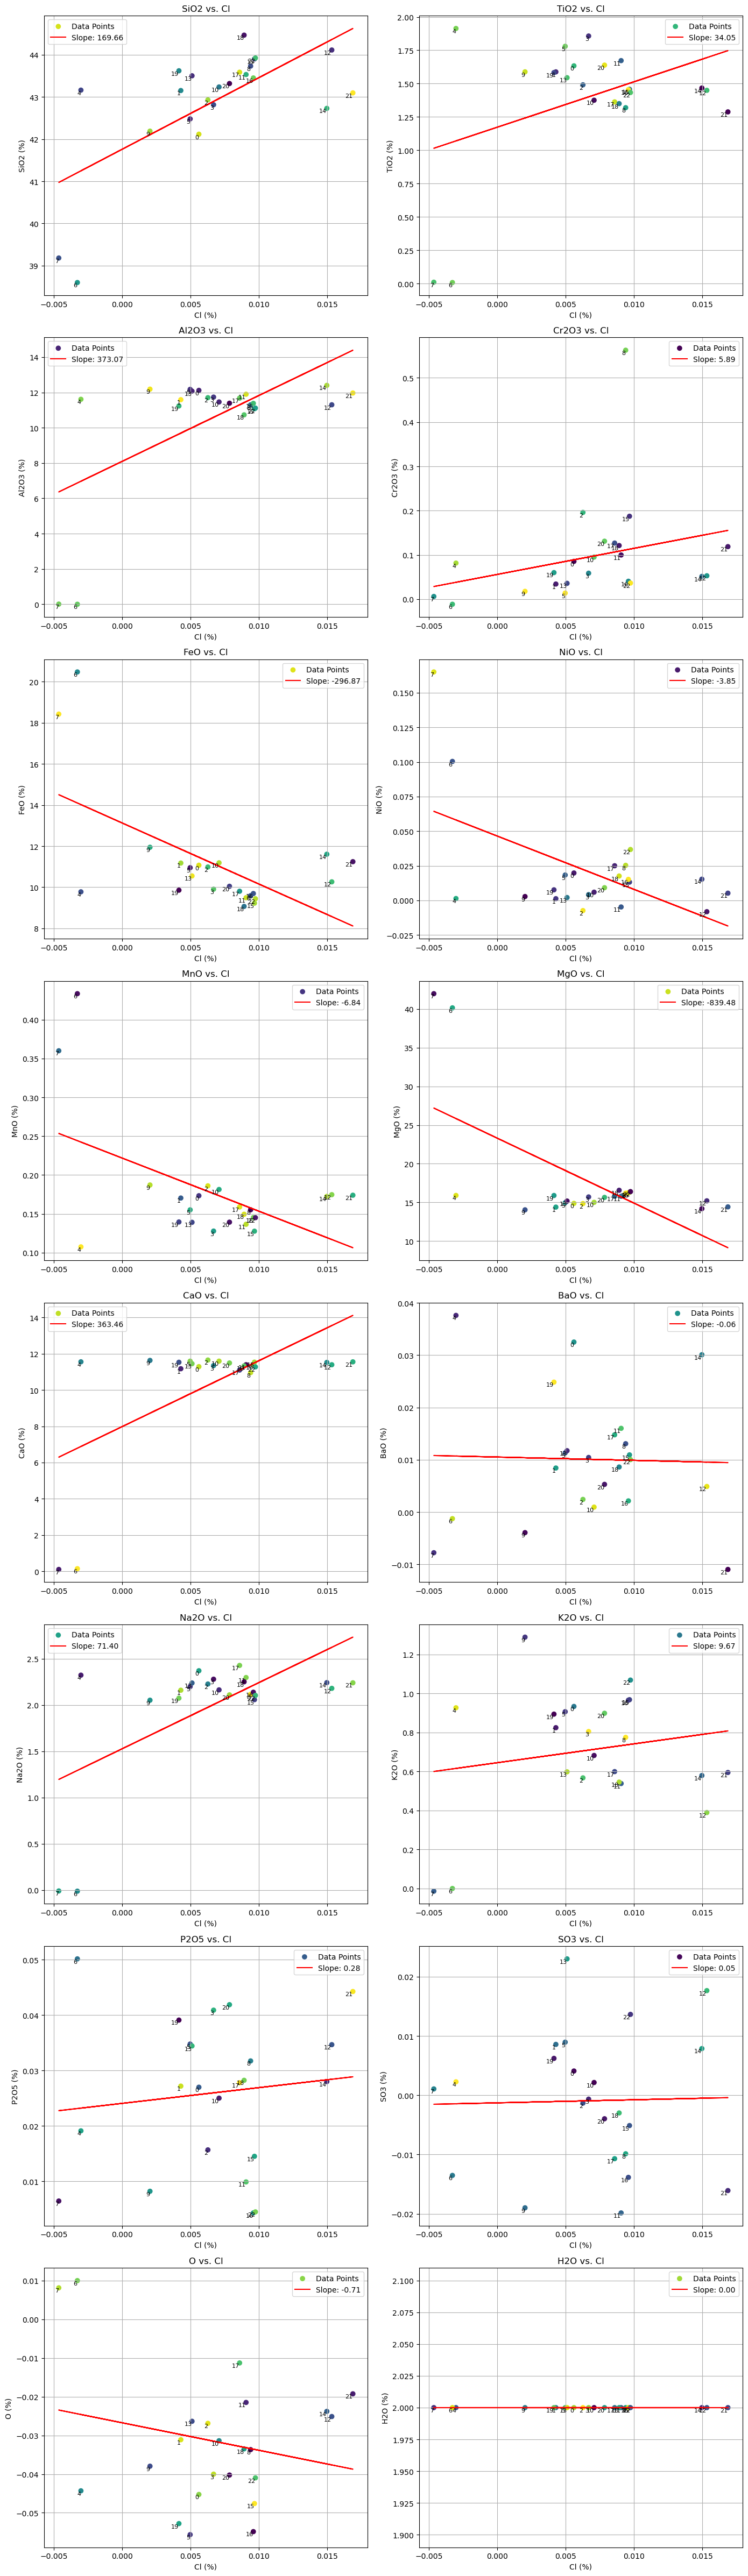

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.2 Analyses/EPMA RAW DATA.2/Tomas Salazar 7-22-2024 samples.xlsx'
sheet_name = '7550'

try:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    raise

data.columns = data.columns.str.strip()

element_names = ['SiO2', 'TiO2', 'Al2O3', 'Cr2O3', 'FeO', 'NiO', 'MnO', 'MgO', 'CaO', 'BaO', 'Na2O', 'K2O', 'P2O5', 'SO3', 'O', 'H2O']

if 'Cl' not in data.columns:
    raise KeyError("'Cl' column is missing from the data.")

Cl = data['Cl']

num_elements = len(element_names)
num_rows = (num_elements + 1) // 2  # Round up to handle odd numbers of elements
fig, axs = plt.subplots(num_rows, 2, figsize=(14, 6 * num_rows))

axs = axs.flatten()

for i, name in enumerate(element_names):
    if name not in data.columns:
        print(f"Warning: '{name}' column is missing from the data.")
        continue
    
    element = data[name]
    colors = np.random.rand(len(Cl))  # Random colors for scatter plot
    slope, intercept, r_value, p_value, std_err = stats.linregress(Cl, element)
    
    scatter = axs[i].scatter(Cl, element, c=colors, cmap='viridis', label='Data Points')
    axs[i].plot(Cl, slope * Cl + intercept, color='red', label=f'Slope: {slope:.2f}')
    axs[i].set_title(f'{name} vs. Cl')
    axs[i].set_xlabel('Cl (%)')
    axs[i].set_ylabel(f'{name} (%)')
    axs[i].grid(True)
    axs[i].legend()

    for j, txt in enumerate(range(len(Cl))):
         axs[i].annotate(txt, (Cl.iloc[j], element.iloc[j]), fontsize=8, ha='right', va='top')

for j in range(num_elements, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [43]:
import pandas as pd

def classify_mineral(row):
    mineral_types = []
    
    if 42 < row['SiO2'] < 45 and 14 < row['MgO'] < 17 and 9 < row['FeO'] < 12 and row['Na2O'] < 3 and 10 < row['CaO'] < 12 and 10 < row['Al2O3'] < 13 and row['TOTAL'] < 100 and row['TiO2'] > 1:
        mineral_types.append('Amph')
    if 49 < row['SiO2'] < 54 and 13.5 < row['MgO'] < 17 and row['FeO'] < 7 and row['Al2O3'] > 4 and row['CaO'] > 21:
        mineral_types.append('Cpx')
    if 52.5 < row['SiO2'] < 57 and 22 < row['MgO'] < 30 and 10 < row['FeO'] < 19 and row['Al2O3'] < 2 and row['CaO'] < 2:
        mineral_types.append('Opx')
    if row['SiO2'] > 51 and row['Al2O3'] < 24 and row['Na2O'] > 3 and row['CaO'] > 7:
        mineral_types.append('Plagioclase')
    if row['MgO'] > 40:
        mineral_types.append('Olv')
    return ', '.join(mineral_types) if mineral_types else 'Unknown'

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.2 Analyses/EPMA RAW DATA.2/Tomas Salazar 7-22-2024 samples.xlsx'
sheet_name = '7550'

try:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    raise

data.columns = data.columns.str.strip()

data['Mineral_Type'] = data.apply(classify_mineral, axis=1)

print(data[['SAMPLE', 'SiO2', 'Al2O3', 'MgO', 'FeO', 'Mineral_Type']])


           SAMPLE     SiO2      Al2O3      MgO       FeO Mineral_Type
0   7550-1-2 L1.1  42.1166  12.117200  14.8694  11.07140         Amph
1   7550-1-2 L1.1  43.1522  11.588700  14.3853  11.17740         Amph
2   7550-1-2 L1.1  42.9304  11.704000  14.8400  10.98650         Amph
3   7550-1-2 L1.1  42.8152  11.735200  15.7009   9.90594         Amph
4   7550-1-2 L1.1  43.1620  11.611100  15.8930   9.77775         Amph
5   7550-1-2 L1.1  42.4796  12.173700  14.9570  10.95170         Amph
6   7550-1-2 L2.1  44.6199  10.599300  16.2799   9.38049         Amph
7   7550-1-2 L2.2  43.3163  11.307500  15.9140   9.70092         Amph
8   7550-1-2 L2.3  38.5995  -0.000050  40.1541  20.47530          Olv
9   7550-1-2 L2.4  39.1809   0.009084  41.9874  18.42470          Olv
10  7550-1-2 L2.5  43.7319  11.299500  16.1894   9.59216         Amph
11  7550-1-2 L2.6  42.1892  12.186000  14.0340  11.94620         Amph
12  7550-1-2 L2.7  43.2366  11.460200  15.0025  11.18940         Amph
13  7550-1-2 L3.1  4

In [44]:
import pandas as pd

def classify_mineral(row):
    mineral_types = []
    
    if 41 < row['SiO2'] < 49 and 12 < row['MgO'] < 17 and 9 < row['FeO'] < 14 and row['Na2O'] < 3 and 10 < row['CaO'] < 12 and 6 < row['Al2O3'] < 13 and row['TOTAL'] < 100 and row['TiO2'] > 1:
        mineral_types.append('Amph')
    if 51 < row['SiO2'] and 14 < row['MgO'] < 17 and row['FeO'] < 9 and row['Al2O3'] > 1 and row['CaO'] > 21:
        mineral_types.append('Cpx')
    if 52 < row['SiO2'] < 57 and 22 < row['MgO'] < 30 and 10 < row['FeO'] < 19 and row['Al2O3'] < 2 and row['CaO'] > 20:
        mineral_types.append('Opx')
    if row['SiO2'] > 47 and row['Al2O3'] > 20 and row['Na2O'] > 2 and row['CaO'] > 6:
        mineral_types.append('Plagioclase')
    if row['MgO'] > 40:
        mineral_types.append('Olv')
    return ', '.join(mineral_types) if mineral_types else 'Review'

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.2 Analyses/EPMA RAW DATA.2/Tomas Salazar 7-22-2024 samples.xlsx'
sheet_name = '7550'

try:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    raise

data.columns = data.columns.str.strip()

data['Mineral_Type'] = data.apply(classify_mineral, axis=1)

print(data[['SAMPLE', 'Mineral_Type']])


           SAMPLE Mineral_Type
0   7550-1-2 L1.1         Amph
1   7550-1-2 L1.1         Amph
2   7550-1-2 L1.1         Amph
3   7550-1-2 L1.1         Amph
4   7550-1-2 L1.1         Amph
5   7550-1-2 L1.1         Amph
6   7550-1-2 L2.1         Amph
7   7550-1-2 L2.2         Amph
8   7550-1-2 L2.5         Amph
9   7550-1-2 L2.6         Amph
10  7550-1-2 L2.7         Amph
11  7550-1-2 L3.1         Amph
12  7550-1-2 L3.2         Amph
13  7550-1-2 L3.3         Amph
14  7550-1-2 L3.4         Amph
15  7550-1-2 L3.5         Amph
16  7550-1-2 L3.6         Amph
17  7550-1-2 L4.1         Amph
18  7550-1-2 L4.2         Amph
19  7550-1-2 L4.3         Amph
20  7550-1-2 L4.4         Amph
21  7550-1-2 L4.5         Amph
22  7550-1-2 L4.6         Amph
